In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence

In [3]:
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
import os
os.environ["PYTHONIOENCODING"] = "utf-8"
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd

In [6]:
nsmc_train_df = pd.read_excel('./영화목록.xlsx')


In [7]:

#nsmc_train_df = pd.read_csv('./new_data.csv', encoding = 'cp949', header = 0, engine = 'python')

In [8]:
import pandas as pd
nsmc_train_df.head()

,Unnamed: 0,name,num,review
0,0,명량,10,역대 대명작이라 자부합니다^^
1,1,명량,10,진짜 이건 우리나라 영화계에 한 획을 그을 정도에 명작입니다 우리가 역사를 배워야 ...
2,2,명량,3,"국뽕 범벅, 거품, 스크린독점 관객동원"
3,3,명량,10,초등 고학년 아들과 진도에 다녀온후 같이 봣는데 정말 감사하고 감동이며 죄송스러운 ...
4,4,명량,10,"깊게 숨을 들이쉬고 후하고 내뱉은 뒤, 이 영화를 보아라. 다보고 나서 이틀 뒤에 ..."


In [9]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   name        10000 non-null  object
 2   num         10000 non-null  int64 
 3   review      8930 non-null   object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


## 결측치 데이터 삭제

In [10]:
nsmc_train_df[nsmc_train_df['review'].isnull()]

,Unnamed: 0,name,num,review
8,8,명량,10,NaN
9,9,명량,10,NaN
44,44,명량,10,NaN
49,49,명량,10,NaN
76,76,명량,10,NaN
...,...,...,...,...
9971,9971,블랙 팬서,10,NaN
9987,9987,블랙 팬서,9,NaN
9988,9988,블랙 팬서,10,NaN
9990,9990,블랙 팬서,10,NaN


In [11]:
nsmc_train_df = nsmc_train_df.dropna()

## 중복 데이터 삭제

In [12]:
nsmc_train_df = nsmc_train_df.drop_duplicates(['review'])

In [13]:
nsmc_train_df.info()  # isnull 데이터 삭제 된 것 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8696 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8696 non-null   int64 
 1   name        8696 non-null   object
 2   num         8696 non-null   int64 
 3   review      8696 non-null   object
dtypes: int64(2), object(2)
memory usage: 339.7+ KB


## x_data, y_data 분리

In [14]:
nsmc_train_df

,Unnamed: 0,name,num,review
0,0,명량,10,역대 대명작이라 자부합니다^^
1,1,명량,10,진짜 이건 우리나라 영화계에 한 획을 그을 정도에 명작입니다 우리가 역사를 배워야 ...
2,2,명량,3,"국뽕 범벅, 거품, 스크린독점 관객동원"
3,3,명량,10,초등 고학년 아들과 진도에 다녀온후 같이 봣는데 정말 감사하고 감동이며 죄송스러운 ...
4,4,명량,10,"깊게 숨을 들이쉬고 후하고 내뱉은 뒤, 이 영화를 보아라. 다보고 나서 이틀 뒤에 ..."
...,...,...,...,...
9994,9994,블랙 팬서,10,나의 영원한 왕 영원한 히어로..이제 하늘을 지키기위해 갔다고 생각할래요...와칸다...
9996,9996,블랙 팬서,10,"와칸다의 왕, 그의 죽음은 끝이 아니길.."
9997,9997,블랙 팬서,10,와칸다 포에버!! 당신이 떠났어도 왕국을 지키겠습니다
9998,9998,블랙 팬서,10,처음 볼 때는 그저 재미있는 영화라고 생각을 하였습니다. 그런데 암 투병 중에 촬영...


In [15]:
# 정규표현식 사용해서
x_data = nsmc_train_df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
y_data = nsmc_train_df['num']
y_data
print(x_data.shape, y_data.shape)

(8696,) (8696,)


In [16]:
x_data.dtype

dtype('O')

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
df_stop = pd.read_csv('./한국어불용어100.txt',sep = '\t', encoding = 'utf-8')
stop_word = df_stop['불용어']

In [19]:
from konlpy.tag import Okt
okt = Okt()
stop_word = stop_word.values
stop_word

In [22]:
# 형태소 분석기
x_stopword = [] 
for x in x_data:
    temp = []
    temp = okt.morphs(x)
    
    token = []
    for y in temp:
        if not y in stop_word:
            token.append(y)
            
    x_stopword.append(token)
    
    
x_stopword

[['역대', '대', '명작', '이라', '자부', '합니다'],
 ['진짜',
  '이건',
  '우리나라',
  '영화계',
  '에',
  '획',
  '을',
  '그을',
  '에',
  '명작',
  '입니다',
  '역사',
  '를',
  '배워야',
  '하는',
  '이유',
  '도',
  '잊지',
  '말아야',
  '하는',
  '이유',
  '도',
  '영화',
  '에',
  '담겨있습니다'],
 ['국뽕', '범벅', '거품', '스크린', '독점', '관객', '동원'],
 ['초등',
  '고학년',
  '아들',
  '과',
  '진도',
  '에',
  '다녀온',
  '후',
  '같이',
  '봣는데',
  '정말',
  '감사하고',
  '감동',
  '이며',
  '죄송스러운',
  '마음',
  '겹',
  '치네요'],
 ['깊게',
  '숨',
  '을',
  '들이',
  '쉬',
  '고',
  '후',
  '하고',
  '내뱉은',
  '뒤',
  '영화',
  '를',
  '보아',
  '라',
  '다',
  '보고',
  '나서',
  '이틀',
  '뒤',
  '에',
  '분동',
  '조깅',
  '하고',
  '나서',
  '청국장',
  '을',
  '먹은',
  '뒤',
  '에',
  '영화',
  '를',
  '보아',
  '라',
  '일주일',
  '뒤',
  '모두',
  '잠',
  '이든',
  '새벽',
  '에',
  '불',
  '을',
  '다',
  '끄고',
  '영화',
  '를',
  '보아',
  '라',
  '그러면',
  '게',
  '될것이다',
  '이영화',
  '는',
  '한치',
  '의',
  '흠',
  '도',
  '없이',
  '완벽하게',
  '이순신장군',
  '과',
  '명량해전',
  '을',
  '연출',
  '했다는',
  '을',
  '는',
  '영화',
  '를',
  '만든',
  '감독',
  '을',
  '존경'

In [23]:
'''
x_stopword = []
for x in x_data:
    word_tokens = okt.morphs(x)    
    result = [word for word in word_tokens if not word in stop_word]
    x_stopword.append(result)
    
x_stopword
'''


'\nx_stopword = []\nfor x in x_data:\n    word_tokens = okt.morphs(x)    \n    result = [word for word in word_tokens if not word in stop_word]\n    x_stopword.append(result)\n    \nx_stopword\n'

In [24]:
word_list = []
for i in x_stopword:
    word = []
    for j in i:
        # 명사만 추출
        for x in okt.pos(j,norm= True):
            if(x[1] == 'Noun'):
                word.append((x[0]))
    word_list.append(word)
word_list

[['역대', '명작', '자부'],
 ['진짜',
  '것',
  '우리나라',
  '영화계',
  '획',
  '그을',
  '명작',
  '역사',
  '를',
  '이유',
  '도',
  '이유',
  '도',
  '영화'],
 ['국뽕', '범벅', '거품', '스크린', '독점', '관객', '동원'],
 ['초등', '고학년', '아들', '과', '진도', '후', '봣는데', '정말', '감동', '마음', '겹'],
 ['숨',
  '쉬',
  '고',
  '후',
  '뒤',
  '영화',
  '를',
  '보아',
  '보고',
  '이틀',
  '뒤',
  '분동',
  '조깅',
  '청국장',
  '뒤',
  '영화',
  '를',
  '보아',
  '일주일',
  '뒤',
  '모두',
  '잠',
  '새벽',
  '불',
  '영화',
  '를',
  '보아',
  '게',
  '이영화',
  '한치',
  '의',
  '흠',
  '도',
  '이순신장군',
  '과',
  '명량해전',
  '연출',
  '영화',
  '를',
  '감독',
  '존경'],
 ['낮', '당', '터', '주준'],
 ['훌룡', '과', '역사', '재료', '를', '루즈', '연출', '과', '스토리', '전개', '로', '후반', '갈수록'],
 ['수준', '영화', '걸', '명작', '의', '정신', '상태'],
 ['이제야', '대작', '줄'],
 ['이순신', '장군', '대한민국', '건', '제하', '거'],
 ['나라', '를', '위해', '끝', '이순신', '장군', '사랑', '존경'],
 ['연출',
  '긴장감',
  '연기력',
  '역사',
  '를',
  '면',
  '고증',
  '얼마나',
  '이순신',
  '장군',
  '의',
  '내면',
  '고민',
  '도',
  '표현',
  '넷',
  '플로',
  '영화'],
 ['이름', '이순신'],
 ['배경음악', '도'],
 ['

## 단어 빈도수 체크

In [25]:
word_freq = []
for i in word_list:
    for j in i:  
        word_freq.append(j)
    

In [26]:
word_freq

['역대',
 '명작',
 '자부',
 '진짜',
 '것',
 '우리나라',
 '영화계',
 '획',
 '그을',
 '명작',
 '역사',
 '를',
 '이유',
 '도',
 '이유',
 '도',
 '영화',
 '국뽕',
 '범벅',
 '거품',
 '스크린',
 '독점',
 '관객',
 '동원',
 '초등',
 '고학년',
 '아들',
 '과',
 '진도',
 '후',
 '봣는데',
 '정말',
 '감동',
 '마음',
 '겹',
 '숨',
 '쉬',
 '고',
 '후',
 '뒤',
 '영화',
 '를',
 '보아',
 '보고',
 '이틀',
 '뒤',
 '분동',
 '조깅',
 '청국장',
 '뒤',
 '영화',
 '를',
 '보아',
 '일주일',
 '뒤',
 '모두',
 '잠',
 '새벽',
 '불',
 '영화',
 '를',
 '보아',
 '게',
 '이영화',
 '한치',
 '의',
 '흠',
 '도',
 '이순신장군',
 '과',
 '명량해전',
 '연출',
 '영화',
 '를',
 '감독',
 '존경',
 '낮',
 '당',
 '터',
 '주준',
 '훌룡',
 '과',
 '역사',
 '재료',
 '를',
 '루즈',
 '연출',
 '과',
 '스토리',
 '전개',
 '로',
 '후반',
 '갈수록',
 '수준',
 '영화',
 '걸',
 '명작',
 '의',
 '정신',
 '상태',
 '이제야',
 '대작',
 '줄',
 '이순신',
 '장군',
 '대한민국',
 '건',
 '제하',
 '거',
 '나라',
 '를',
 '위해',
 '끝',
 '이순신',
 '장군',
 '사랑',
 '존경',
 '연출',
 '긴장감',
 '연기력',
 '역사',
 '를',
 '면',
 '고증',
 '얼마나',
 '이순신',
 '장군',
 '의',
 '내면',
 '고민',
 '도',
 '표현',
 '넷',
 '플로',
 '영화',
 '이름',
 '이순신',
 '배경음악',
 '도',
 '연기',
 '배경',
 '가족영화',
 '해도',
 '용인',
 '약간',
 '

In [27]:
from nltk import FreqDist

In [28]:
fd_names = FreqDist(word_freq)
dict_fd = fd_names.items()

In [30]:
# 빈도수 제거
for dict in dict_fd:
    key = dict[0] # 단어
    val = dict[1] # 횟수
    if val<20:
        for w in word_list:
            if key in w:
                w.remove(key)
print(word_list)

[['역대', '명작'], ['진짜', '것', '우리나라', '명작', '역사', '를', '이유', '도', '이유', '도', '영화'], ['국뽕', '관객'], ['아들', '과', '후', '정말', '감동', '마음'], ['고', '후', '뒤', '영화', '를', '보고', '뒤', '뒤', '영화', '를', '보아', '뒤', '모두', '영화', '를', '보아', '게', '이영화', '의', '도', '과', '연출', '영화', '를', '감독', '존경'], ['당', '터'], ['과', '역사', '를', '연출', '과', '스토리', '전개', '로', '후반'], ['수준', '영화', '걸', '명작', '의', '정신'], ['이제야', '대작', '줄'], ['이순신', '장군', '대한민국', '건', '거'], ['나라', '를', '위해', '끝', '이순신', '장군', '사랑', '존경'], ['연출', '긴장감', '연기력', '역사', '를', '면', '고증', '얼마나', '이순신', '장군', '의', '도', '표현', '영화'], ['이름', '이순신'], ['도'], ['연기', '배경', '해도', '약간', '의', '감동'], ['국뽕', '눈물'], ['국뽕', '제대로', '국뽕', '이순신', '장군', '은', '세계', '분'], ['예전', '극장', '정말'], ['바', '게', '를', '진짜'], ['국뽕', '감성', '팔이', '용', '영화'], ['영화', '도', '욕', '게', '영화', '영화로', '전투', '를', '이제', '장군', '얼마나', '게'], ['동안', '보지', '연기', '건', '은', '정말', '뭔가', '부분', '존재'], ['민족', '의', '영웅', '이순신', '장군', '영화', '의', '제', '조금', '만', '실망', '감', '다음', '소재', '로', '의', '영화', '를', '기대', '당시',

# 자연어 처리

## okt 형태소 분석

In [31]:
from konlpy.tag import Okt
okt = Okt()
'''

# 품사 분석 noun, adjective, verb
word_list = []
for i in x_data:
    word = []
    for j in okt.pos(i,norm = True):
        if j[1] == 'Noun' :
        #if j[1] == 'Noun' or j[1]=='Adjective' or j[1] == 'Verb':
            word.append((j[0]))
    word_list.append(word)
print(word_list)
'''

"\n\n# 품사 분석 noun, adjective, verb\nword_list = []\nfor i in x_data:\n    word = []\n    for j in okt.pos(i,norm = True):\n        if j[1] == 'Noun' :\n        #if j[1] == 'Noun' or j[1]=='Adjective' or j[1] == 'Verb':\n            word.append((j[0]))\n    word_list.append(word)\nprint(word_list)\n"

## x 데이터 토큰화

In [32]:
len(word_list)

8696

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(word_list)
sequences = tokenizer.texts_to_sequences(word_list)
sequences

[[220, 29],
 [6, 108, 125, 29, 42, 4, 132, 3, 132, 3, 1],
 [389, 152],
 [230, 12, 158, 14, 15, 78],
 [20,
  158,
  183,
  1,
  4,
  18,
  183,
  183,
  1,
  4,
  713,
  183,
  94,
  1,
  4,
  713,
  17,
  118,
  2,
  3,
  12,
  25,
  1,
  4,
  33,
  408],
 [438, 580],
 [12, 42, 4, 25, 12, 11, 114, 8, 164],
 [109, 1, 74, 29, 2, 294],
 [231, 458, 140],
 [295, 272, 83, 115, 30],
 [92, 4, 100, 71, 295, 272, 87, 408],
 [25, 137, 90, 42, 4, 55, 481, 193, 295, 272, 2, 3, 112, 1],
 [528, 295],
 [3],
 [7, 409, 179, 350, 2, 15],
 [389, 44],
 [389, 201, 389, 295, 272, 5, 235, 60],
 [439, 102, 14],
 [459, 17, 4, 6],
 [389, 236, 552, 194, 1],
 [1, 3, 273, 17, 1, 136, 482, 4, 105, 272, 193, 17],
 [266, 274, 7, 115, 5, 14, 180, 57, 315],
 [581,
  2,
  221,
  295,
  272,
  1,
  2,
  75,
  126,
  9,
  330,
  106,
  267,
  175,
  8,
  2,
  1,
  4,
  146,
  98,
  2,
  125,
  146,
  4],
 [6, 295, 5, 27, 79, 1, 50, 6, 390],
 [50, 296, 129],
 [295, 272, 31, 5, 1, 2, 286, 3, 33, 158, 158, 866, 5, 286, 46],
 

In [34]:
word_index = tokenizer.word_index
word_index

{'영화': 1,
 '의': 2,
 '도': 3,
 '를': 4,
 '은': 5,
 '진짜': 6,
 '연기': 7,
 '로': 8,
 '만': 9,
 '최고': 10,
 '스토리': 11,
 '과': 12,
 '배우': 13,
 '정말': 14,
 '감동': 15,
 '인': 16,
 '게': 17,
 '보고': 18,
 '왜': 19,
 '고': 20,
 '액션': 21,
 '그냥': 22,
 '못': 23,
 '평점': 24,
 '연출': 25,
 '장면': 26,
 '인생': 27,
 '요': 28,
 '명작': 29,
 '거': 30,
 '볼': 31,
 '마지막': 32,
 '감독': 33,
 '재미': 34,
 '한국': 35,
 '시리즈': 36,
 '처음': 37,
 '네': 38,
 '저': 39,
 '편': 40,
 '임': 41,
 '역사': 42,
 '작품': 43,
 '눈물': 44,
 '느낌': 45,
 '해': 46,
 '꼭': 47,
 '모든': 48,
 '마블': 49,
 '뭐': 50,
 '역시': 51,
 '함': 52,
 '부터': 53,
 '씬': 54,
 '면': 55,
 '성': 56,
 '부분': 57,
 '마다': 58,
 '현실': 59,
 '분': 60,
 '이나': 61,
 '개봉': 62,
 '스파이더맨': 63,
 '가장': 64,
 '듯': 65,
 '강동원': 66,
 '한번': 67,
 '내용': 68,
 '캐릭터': 69,
 '주인공': 70,
 '끝': 71,
 '영': 72,
 '기억': 73,
 '걸': 74,
 '제': 75,
 '난': 76,
 '이해': 77,
 '마음': 78,
 '자체': 79,
 '화': 80,
 '제일': 81,
 '몰입': 82,
 '대한민국': 83,
 '추천': 84,
 '몇': 85,
 '처럼': 86,
 '사랑': 87,
 '기': 88,
 '대사': 89,
 '연기력': 90,
 '이야기': 91,
 '나라': 92,
 '한국영': 93,
 '모두': 9

In [35]:
vocab_size = len(word_index)
vocab_size

1564

## 리뷰 최대 길이 확인

In [36]:
TextMAX = max(len(l) for l in sequences)

In [37]:
print('리뷰 최대 길이 : {}'.format(max(len(l) for l in sequences))) 

리뷰 최대 길이 : 144


리뷰 최대 길이 : 946
리뷰 평균 길이 : 46.37925482980681


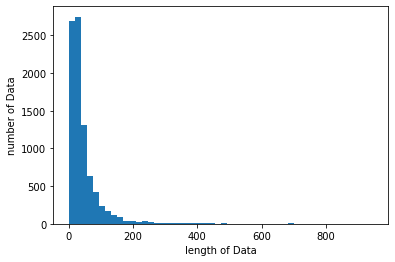

In [38]:
print('리뷰 최대 길이 : {}'.format(max(len(l) for l in x_data))) 
print('리뷰 평균 길이 : {}'.format(sum(map(len, x_data)) / len(x_data)))
plt.hist([len(s) for s in x_data], bins=50) 
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()


## x 데이터 y 데이터 자연어처리

In [39]:
max_len = TextMAX
x_data = sequence.pad_sequences(sequences, maxlen = max_len)
y_data = np_utils.to_categorical(y_data)

In [40]:
x_data[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 134,  33, 390,
         1], dtype=int32)

In [41]:
y_data.shape

(8696, 11)

In [42]:
textlen = len(x_data[0])

In [43]:
# 원핫인코딩하면 0이 앞에 왜 추가가 되는건지?

In [44]:
y_data = np.delete(y_data,0,axis =1)

In [45]:
y_data[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [46]:
len(y_data[0])

10

## train, validation 데이터 분리

In [47]:
X_train,X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6087, 144) (2609, 144) (6087, 10) (2609, 10)


In [48]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_test)
validation_y = np.asarray(y_test)

# 모델 구축

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [50]:
#vocab_size = 30000

In [51]:
# GRU 모델 - 유민석님 공유
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding


hidden_units = 512


model = Sequential()
model.add(Embedding(vocab_size +1, textlen))
model.add(GRU(hidden_units))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_x, train_y, epochs=15,
                   validation_data=(validation_x,validation_y))

2022-01-13 09:39:32.330223: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-13 09:39:32.332583: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 6087 samples, validate on 2609 samples
Epoch 1/15


2022-01-13 09:39:36.437135: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_gru_2605_3164_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_3349' and '__inference___backward_standard_gru_2605_3164' both implement 'gru_f0096f3b-c9cb-4ad5-adeb-aa6cb415ec95' but their signatures do not match.


6080/6087 [============================>.] - ETA: 0s - loss: 1.4513 - acc: 0.6059

2022-01-13 09:43:19.624896: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_gru_4125_specialized_for_sequential_gru_StatefulPartitionedCall_at___inference_distributed_function_4436' and '__inference_standard_gru_4125' both implement 'gru_c3e13b00-36b9-4543-a42f-e88e9bbeb208' but their signatures do not match.


6087/6087 [==============================] - 264s 43ms/sample - loss: 1.4515 - acc: 0.6059 - val_loss: 1.4673 - val_acc: 0.5791
Epoch 2/15
6087/6087 [==============================] - 276s 45ms/sample - loss: 1.3045 - acc: 0.6182 - val_loss: 1.3345 - val_acc: 0.6159
Epoch 3/15
6087/6087 [==============================] - 296s 49ms/sample - loss: 1.2332 - acc: 0.6338 - val_loss: 1.3888 - val_acc: 0.5914
Epoch 4/15
6087/6087 [==============================] - 314s 52ms/sample - loss: 1.1854 - acc: 0.6397 - val_loss: 1.3397 - val_acc: 0.6044
Epoch 5/15
6087/6087 [==============================] - 299s 49ms/sample - loss: 1.1378 - acc: 0.6506 - val_loss: 1.3902 - val_acc: 0.6014
Epoch 6/15
6087/6087 [==============================] - 285s 47ms/sample - loss: 1.0935 - acc: 0.6594 - val_loss: 1.3906 - val_acc: 0.5768
Epoch 7/15
6087/6087 [==============================] - 294s 48ms/sample - loss: 1.0390 - acc: 0.6760 - val_loss: 1.4521 - val_acc: 0.6117
Epoch 8/15
6087/6087 [================

In [52]:
'''
model = Sequential()
model.add(Embedding(vocab_size +1, textlen))
model.add(LSTM(textlen))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
'''


In [160]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_x, train_y, epochs=30,
                    validation_data=(validation_x, validation_y), 
                    callbacks=[early_stop])



************ TRAINING START ************ 
Train on 6087 samples, validate on 2609 samples
Epoch 1/30


2022-01-12 21:07:47.283852: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_22413_22898' and '__inference___backward_standard_lstm_22413_22898_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_23080' both implement 'lstm_8133a407-3ce2-422f-8f09-ea4a28dc4830' but their signatures do not match.


6080/6087 [============================>.] - ETA: 0s - loss: 1.4421 - accuracy: 0.6062

2022-01-12 21:09:26.786328: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_23853_specialized_for_sequential_2_lstm_StatefulPartitionedCall_at___inference_distributed_function_24229' and '__inference_cudnn_lstm_with_fallback_23964' both implement 'lstm_c39187cc-3d82-4690-a24e-004950f7eec4' but their signatures do not match.


6087/6087 [==============================] - 122s 20ms/sample - loss: 1.4420 - accuracy: 0.6062 - val_loss: 1.4509 - val_accuracy: 0.6025
Epoch 2/30
6087/6087 [==============================] - 151s 25ms/sample - loss: 1.3071 - accuracy: 0.6161 - val_loss: 1.3580 - val_accuracy: 0.6071
Epoch 3/30
6087/6087 [==============================] - 148s 24ms/sample - loss: 1.2488 - accuracy: 0.6325 - val_loss: 1.3503 - val_accuracy: 0.5983
Epoch 4/30
6087/6087 [==============================] - 152s 25ms/sample - loss: 1.2073 - accuracy: 0.6363 - val_loss: 1.3539 - val_accuracy: 0.5903
Epoch 5/30
6087/6087 [==============================] - 1467s 241ms/sample - loss: 1.1786 - accuracy: 0.6438 - val_loss: 1.3570 - val_accuracy: 0.6202
Epoch 6/30
6087/6087 [==============================] - 170s 28ms/sample - loss: 1.1537 - accuracy: 0.6471 - val_loss: 1.3360 - val_accuracy: 0.6044
Epoch 7/30
6087/6087 [==============================] - 107s 18ms/sample - loss: 1.1237 - accuracy: 0.6576 - val_lo

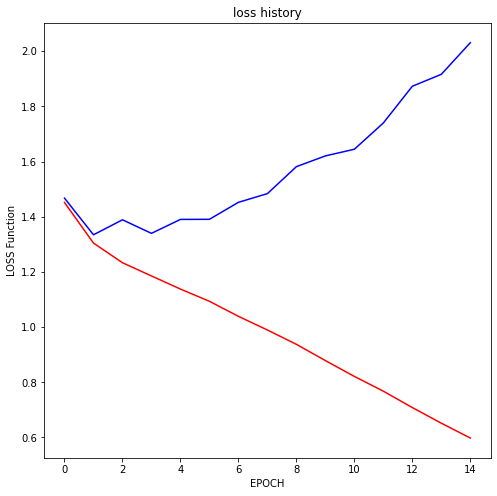

In [54]:
import matplotlib.pyplot as plt
train_history = history.history["loss"]
validate_history = history.history["val_loss"]

fig = plt.figure(figsize = (8,8))
plt.title("loss history")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validate_history,"blue")
plt.show()

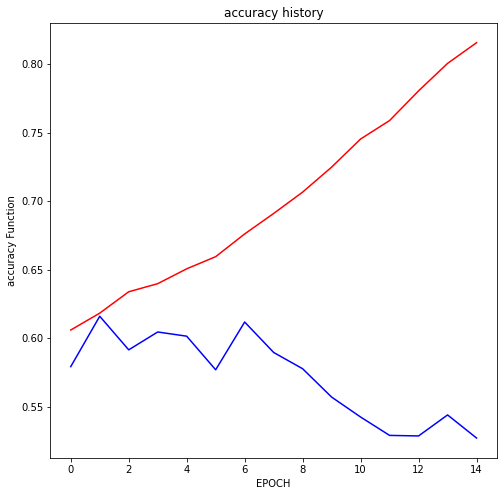

In [58]:
import matplotlib.pyplot as plt
train_history = history.history["acc"]
validate_history = history.history["val_acc"]

fig = plt.figure(figsize = (8,8))
plt.title("accuracy history")
plt.xlabel("EPOCH")
plt.ylabel("accuracy Function")
plt.plot(train_history, "red")
plt.plot(validate_history,"blue")
plt.show()

In [146]:
sentences = []
text_list = ["한 마디로 ‘치유’의 과정","감동입니다..너무 재미있어용","이런 영화가 흥행한 거 보면 세상이 만만한데" ]
#text_list.append("한 마디로 ‘치유’의 과정")
#text_list.append("감동입니다..너무 재미있어용")
#text_list.append("이런 영화가 흥행한 거 보면 세상이 만만한데")
#text_list.append("0점을 주고 싶지만 1점을 줄 수 밖에 없음이 안타깝네.")
#text_list.append("사형수는 개뿔, 죄없는 애들 속여서 끌고간거라고! 유족들은 억울함도 못풀었는데….이런식으로 팔아먹었어야 했냐? 감독 진짜 양심 터졌구나.")
sentences.append(text_list)
sentences

[['한 마디로 ‘치유’의 과정', '감동입니다..너무 재미있어용', '이런 영화가 흥행한 거 보면 세상이 만만한데']]

In [307]:
sentences = []
text = ['처음엔 좋았으나 갈수록 보기 거북함']
sentences.append(text[0])
sentences

['처음엔 좋았으나 갈수록 보기 거북함']

In [308]:
x_stopword1 = [] 
for x in text:
    temp = []
    temp = okt.morphs(x)
    
    token = []
    for y in temp:
        if not y in stop_word:
            token.append(y)
            
    x_stopword1.append(token)

In [309]:
x_stopword1

[['처음', '엔', '좋았으나', '갈수록', '보기', '거북함']]

In [310]:
word_list1 = []
for i in x_stopword1:
    word = []
    for j in i:
        # 명사만 추출
        for x in okt.pos(j,norm= True):
            if(x[1] == 'Noun'):
                word.append((x[0]))
    word_list1.append(word)
word_list1

[['처음', '갈수록', '보기']]

In [311]:
sequences = tokenizer.texts_to_sequences(word_list1)
pred = model.predict(sequences)
print(pred)

[[0.10033912 0.09973596 0.10013392 0.09968847 0.09867291 0.10085892
  0.10012862 0.10174096 0.10032705 0.09837408]]


In [312]:
score
    

7

In [313]:
score_list = []
score = np.argmax(pred)
print("=========================================================================")
print('')
print("👀 리뷰 데이터 👀")
print(text[0])
print('')
print("👥 평점 :",score,"점")
for j in range(score):
    print("✭",end = '')
print('')
print('')
print("=========================================================================")




👀 리뷰 데이터 👀
처음엔 좋았으나 갈수록 보기 거북함

👥 평점 : 7 점
✭✭✭✭✭✭✭



In [296]:
for i in range(1,score):
    for j in range(score):
        print("*",end = '')
        #score_list.append('*')
    
#score_list

**